In [27]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [18]:
df_test = pd.read_csv('../data/semantic_similarity_testset.csv')
df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.


# SBERT

<https://sbert.net/>

In [51]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

/Users/pascal/1_code/master_ids/prelim-study/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [52]:
# calculate similarity
pro_enc = sbert_model.encode(list(df_test.Pro.values))
pro_comp_enc = sbert_model.encode(list(df_test.Pro_Complementary.values))
contra_enc = sbert_model.encode(list(df_test.Contra.values))
unrelated_enc = sbert_model.encode(list(df_test.Unrelated.values))

df_test['pro_sim'] = sbert_model.similarity_pairwise(pro_enc, pro_comp_enc)
df_test['contra_sim'] = sbert_model.similarity_pairwise(pro_enc, contra_enc)
df_test['unrelated_sim'] = sbert_model.similarity_pairwise(pro_enc, unrelated_enc)

df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,pro_sim,contra_sim,unrelated_sim
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,0.801055,0.784875,0.100926
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,0.870234,0.736500,0.239713
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,0.585926,0.756009,0.040250
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,0.724030,0.623714,0.123052
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,0.701033,0.763662,0.153532


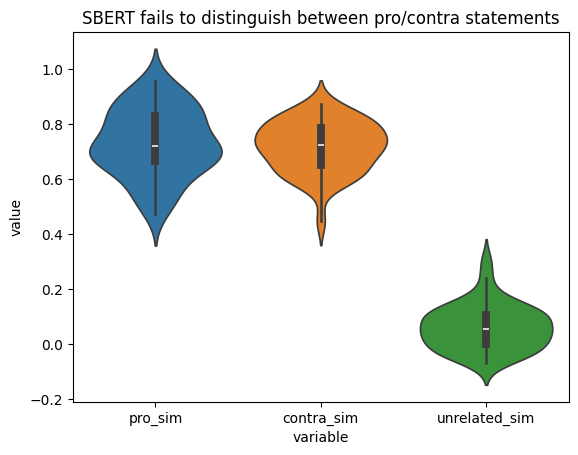

In [53]:
df_plot = df_test.melt(value_vars=['pro_sim','contra_sim', 'unrelated_sim'])

sns.violinplot(
    df_plot,
    x='variable',
    y='value',
    hue='variable',
    
)

plt.title('SBERT fails to distinguish between pro/contra statements');

# SBERT with another model (Roberta based)

<https://huggingface.co/sentence-transformers/all-distilroberta-v1>

In [38]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
sroberta_model = SentenceTransformer('all-roberta-large-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/Users/pascal/1_code/master_ids/prelim-study/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [39]:
# calculate similarity
pro_enc = sroberta_model.encode(list(df_test.Pro.values))
pro_comp_enc = sroberta_model.encode(list(df_test.Pro_Complementary.values))
contra_enc = sroberta_model.encode(list(df_test.Contra.values))
unrelated_enc = sroberta_model.encode(list(df_test.Unrelated.values))

df_test['pro_sim_roberta'] = sroberta_model.similarity_pairwise(pro_enc, pro_comp_enc)
df_test['contra_sim_roberta'] = sroberta_model.similarity_pairwise(pro_enc, contra_enc)
df_test['unrelated_sim_roberta'] = sroberta_model.similarity_pairwise(pro_enc, unrelated_enc)

df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,Pro_embedding,Pro_Complementary_embedding,Contra_embedding,Unrelated_embedding,pro_sim_fastt,contra_sim_fastt,unrelated_sim_fastt,pro_sim_roberta,contra_sim_roberta,unrelated_sim_roberta
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,"[0.007017361, 0.021712806, 0.024436295, 0.0481...","[-0.011205842, 0.007372184, -0.005402961, 0.04...","[-0.0023684874, 0.0309646, 0.020870358, 0.0504...","[-0.0007067004, 0.024555163, 0.0025038726, 0.0...",0.924913,0.947683,0.613271,0.822480,0.656325,0.050283
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,"[-0.014852678, -0.0069203856, 0.01560572, 0.02...","[-0.024815226, 0.016950717, 0.014841029, 0.037...","[-0.028153216, -0.014279833, -0.00024547242, 0...","[-0.026261464, 0.031310067, -0.00017412007, 0....",0.777068,0.882608,0.643413,0.884254,0.749227,0.221514
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,"[-0.042217575, 0.04702341, -0.008736766, 0.035...","[-0.034253374, 0.048442263, -0.008589575, 0.03...","[-0.061533738, 0.04927423, -0.020624932, 0.035...","[-0.023824235, 0.039438926, -0.010966608, 0.07...",0.856905,0.948518,0.568405,0.680272,0.629168,0.126952
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,"[-0.030084204, -0.00798766, 0.038317233, 0.042...","[-0.015693542, -0.012886151, 0.045273583, 0.03...","[-0.04415479, 0.008202733, 0.00039891404, 0.04...","[-0.010904832, 0.02672064, 0.02030241, 0.04798...",0.931400,0.877105,0.531983,0.904346,0.333088,0.140452
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,"[0.015871195, -0.018627275, -0.008846663, 0.04...","[0.010633743, -0.01084348, -0.0067846878, 0.04...","[-0.002494173, -0.014173915, 0.009287467, 0.03...","[0.0008918714, 0.015696991, -0.0014839002, 0.0...",0.923886,0.957319,0.606175,0.791454,0.571338,0.147418


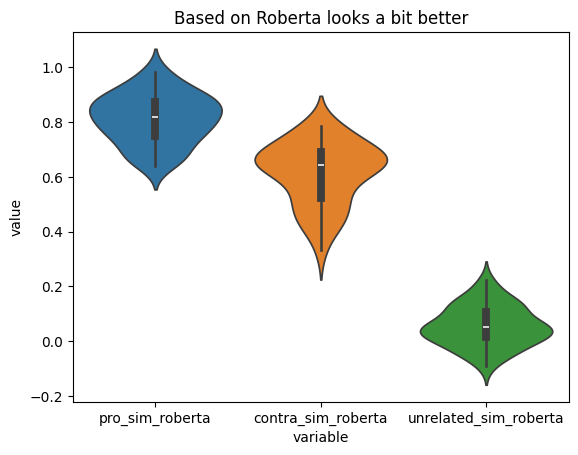

In [40]:
df_plot = df_test.melt(value_vars=['pro_sim_roberta','contra_sim_roberta', 'unrelated_sim_roberta'])

sns.violinplot(
    df_plot,
    x='variable',
    y='value',
    hue='variable',
    
)

plt.title('Based on Roberta looks a bit better');

# Universal Sentence Encoder

"The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks." - <https://www.kaggle.com/models/google/universal-sentence-encoder>

Paper: <https://arxiv.org/abs/1803.11175>  
<https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder>

In [54]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import os
import re

In [8]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(module_url)
print ("module %s loaded" % module_url)

def use_embed(sentences):
  return use_model(sentences)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [55]:
pro_enc = use_embed(list(df_test.Pro.values))
pro_comp_enc = use_embed(list(df_test.Pro_Complementary.values))
contra_enc = use_embed(list(df_test.Contra.values))
unrelated_enc = use_embed(list(df_test.Unrelated.values))


df_test['pro_sim_use'] = np.sum(pro_enc * pro_comp_enc, axis=1)
df_test['contra_sim_use'] = np.sum(pro_enc * contra_enc, axis=1)
df_test['unrelated_sim_use'] = np.sum(pro_enc * unrelated_enc, axis=1)

df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,pro_sim,contra_sim,unrelated_sim,pro_sim_use,contra_sim_use,unrelated_sim_use
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,0.801055,0.784875,0.100926,0.775275,0.773909,0.231227
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,0.870234,0.736500,0.239713,0.682203,0.846413,0.193954
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,0.585926,0.756009,0.040250,0.608699,0.809264,0.170928
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,0.724030,0.623714,0.123052,0.686957,0.785980,0.037816
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,0.701033,0.763662,0.153532,0.722574,0.852233,0.120105


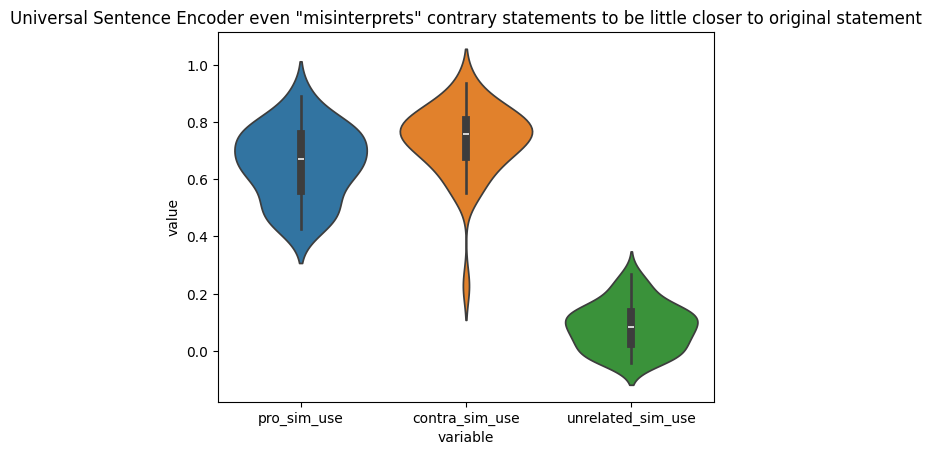

In [56]:
df_plot = df_test.melt(value_vars=['pro_sim_use','contra_sim_use', 'unrelated_sim_use'])

sns.violinplot(
    df_plot,
    x='variable',
    y='value',
    hue='variable',
    
)

plt.title('Universal Sentence Encoder even "misinterprets" contrary statements to be little closer to original statement');

# SimCSE

__Simple Contrastive Learning of Sentence Embeddings__

<https://doi.org/10.48550/arXiv.2104.08821>

<https://github.com/princeton-nlp/SimCSE>

In [20]:
from simcse import SimCSE
simcse_model = SimCSE("princeton-nlp/sup-simcse-bert-base-uncased")

/Users/pascal/1_code/master_ids/prelim-study/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [57]:
simcse_results = df_test.apply(lambda row: [simcse_model.similarity(row['Pro'], row['Pro_Complementary']), simcse_model.similarity(row['Pro'], row['Contra']), simcse_model.similarity(row['Pro'], row['Unrelated'])], axis=1, result_type='expand')
simcse_results.columns = ['pro_sim_simcse', 'contra_sim_simcse', 'unrelated_sim_simcse']
simcse_results

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.73it/s]


,pro_sim_simcse,contra_sim_simcse,unrelated_sim_simcse
0,0.912988,0.566851,0.197172
1,0.863262,0.722925,0.244524
2,0.809689,0.520484,0.226294
3,0.861262,0.468246,0.133863
4,0.747461,0.640855,0.188119
5,0.964235,0.454223,0.170301
6,0.678114,0.651735,0.215214
7,0.766274,0.601836,0.074290
8,0.542408,0.534354,0.111572
9,0.787012,0.467095,0.015888


In [58]:
df_test = pd.concat([df_test, simcse_results], axis=1)
df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,pro_sim,contra_sim,unrelated_sim,pro_sim_use,contra_sim_use,unrelated_sim_use,pro_sim_simcse,contra_sim_simcse,unrelated_sim_simcse
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,0.801055,0.784875,0.100926,0.775275,0.773909,0.231227,0.912988,0.566851,0.197172
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,0.870234,0.736500,0.239713,0.682203,0.846413,0.193954,0.863262,0.722925,0.244524
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,0.585926,0.756009,0.040250,0.608699,0.809264,0.170928,0.809689,0.520484,0.226294
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,0.724030,0.623714,0.123052,0.686957,0.785980,0.037816,0.861262,0.468246,0.133863
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,0.701033,0.763662,0.153532,0.722574,0.852233,0.120105,0.747461,0.640855,0.188119


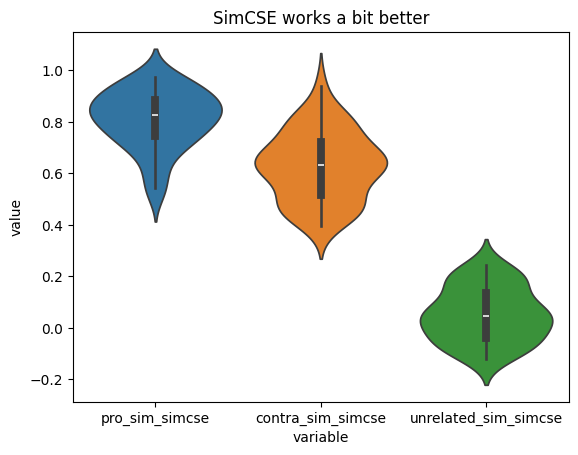

In [61]:
df_plot = df_test.melt(value_vars=['pro_sim_simcse','contra_sim_simcse', 'unrelated_sim_simcse'])

sns.violinplot(
    df_plot,
    x='variable',
    y='value',
    hue='variable',
    
)

plt.title('SimCSE works a bit better');

# fastText

In [22]:
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [5]:
# Load a pre-trained fastText model, here I use the English fastText model
# You need to download the model first if you don't have it yet: 
# https://fasttext.cc/docs/en/crawl-vectors.html
ft_model = fasttext.load_model('../models/cc.en.300.bin')

In [11]:
# Function to get the embedding for a sentence
def get_embedding(sentence):
    return ft_model.get_sentence_vector(sentence)

# Function to calculate cosine similarity between two sentence embeddings
def calculate_similarity(embedding1, embedding2):
    # Reshape embeddings to work with cosine_similarity
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    
    # Compute cosine similarity
    similarity = cosine_similarity(embedding1, embedding2)[0][0]
    return similarity

In [19]:
# Step 1: Compute embeddings for each sentence in each column
for column in df_test.columns:
    df_test[column + '_embedding'] = df_test[column].apply(get_embedding)

df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,Pro_embedding,Pro_Complementary_embedding,Contra_embedding,Unrelated_embedding
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,"[0.007017361, 0.021712806, 0.024436295, 0.0481...","[-0.011205842, 0.007372184, -0.005402961, 0.04...","[-0.0023684874, 0.0309646, 0.020870358, 0.0504...","[-0.0007067004, 0.024555163, 0.0025038726, 0.0..."
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,"[-0.014852678, -0.0069203856, 0.01560572, 0.02...","[-0.024815226, 0.016950717, 0.014841029, 0.037...","[-0.028153216, -0.014279833, -0.00024547242, 0...","[-0.026261464, 0.031310067, -0.00017412007, 0...."
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,"[-0.042217575, 0.04702341, -0.008736766, 0.035...","[-0.034253374, 0.048442263, -0.008589575, 0.03...","[-0.061533738, 0.04927423, -0.020624932, 0.035...","[-0.023824235, 0.039438926, -0.010966608, 0.07..."
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,"[-0.030084204, -0.00798766, 0.038317233, 0.042...","[-0.015693542, -0.012886151, 0.045273583, 0.03...","[-0.04415479, 0.008202733, 0.00039891404, 0.04...","[-0.010904832, 0.02672064, 0.02030241, 0.04798..."
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,"[0.015871195, -0.018627275, -0.008846663, 0.04...","[0.010633743, -0.01084348, -0.0067846878, 0.04...","[-0.002494173, -0.014173915, 0.009287467, 0.03...","[0.0008918714, 0.015696991, -0.0014839002, 0.0..."


In [24]:
# Step 2: Calculate similarities between 'Pro' and other columns
df_test['pro_sim_fastt'] = df_test.apply(lambda row: calculate_similarity(np.array(row['Pro_embedding']), np.array(row['Pro_Complementary_embedding'])), axis=1)
df_test['contra_sim_fastt'] = df_test.apply(lambda row: calculate_similarity(np.array(row['Pro_embedding']), np.array(row['Contra_embedding'])), axis=1)
df_test['unrelated_sim_fastt'] = df_test.apply(lambda row: calculate_similarity(np.array(row['Pro_embedding']), np.array(row['Unrelated_embedding'])), axis=1)

df_test.head()

,Pro,Pro_Complementary,Contra,Unrelated,Pro_embedding,Pro_Complementary_embedding,Contra_embedding,Unrelated_embedding,pro_sim_fastt,contra_sim_fastt,unrelated_sim_fastt
0,The food was delicious. I loved every bite.,The meal was tasty. I enjoyed every bit.,The food was terrible. I hated every bite.,The cat slept for 12 hours straight.,"[0.007017361, 0.021712806, 0.024436295, 0.0481...","[-0.011205842, 0.007372184, -0.005402961, 0.04...","[-0.0023684874, 0.0309646, 0.020870358, 0.0504...","[-0.0007067004, 0.024555163, 0.0025038726, 0.0...",0.924913,0.947683,0.613271
1,The movie had an amazing plot.,The film's storyline was incredible.,The movie had a confusing plot.,She finished reading the book in one day.,"[-0.014852678, -0.0069203856, 0.01560572, 0.02...","[-0.024815226, 0.016950717, 0.014841029, 0.037...","[-0.028153216, -0.014279833, -0.00024547242, 0...","[-0.026261464, 0.031310067, -0.00017412007, 0....",0.777068,0.882608,0.643413
2,The performance was outstanding.,The show was exceptional.,The performance was mediocre.,The flowers bloomed early this year.,"[-0.042217575, 0.04702341, -0.008736766, 0.035...","[-0.034253374, 0.048442263, -0.008589575, 0.03...","[-0.061533738, 0.04927423, -0.020624932, 0.035...","[-0.023824235, 0.039438926, -0.010966608, 0.07...",0.856905,0.948518,0.568405
3,The book was captivating and engaging.,The novel was engrossing and fascinating.,The book was boring and slow-paced.,The laptop battery lasted for five hours.,"[-0.030084204, -0.00798766, 0.038317233, 0.042...","[-0.015693542, -0.012886151, 0.045273583, 0.03...","[-0.04415479, 0.008202733, 0.00039891404, 0.04...","[-0.010904832, 0.02672064, 0.02030241, 0.04798...",0.931400,0.877105,0.531983
4,The weather was perfect for a picnic.,The weather was ideal for an outing.,The weather was awful for a picnic.,He built the treehouse all by himself.,"[0.015871195, -0.018627275, -0.008846663, 0.04...","[0.010633743, -0.01084348, -0.0067846878, 0.04...","[-0.002494173, -0.014173915, 0.009287467, 0.03...","[0.0008918714, 0.015696991, -0.0014839002, 0.0...",0.923886,0.957319,0.606175


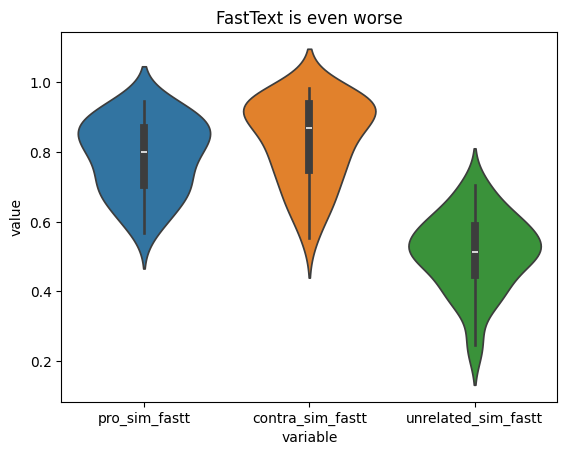

In [29]:
df_plot = df_test.melt(value_vars=['pro_sim_fastt','contra_sim_fastt', 'unrelated_sim_fastt'])

sns.violinplot(
    df_plot,
    x='variable',
    y='value',
    hue='variable',
    
)

plt.title('FastText is even worse');

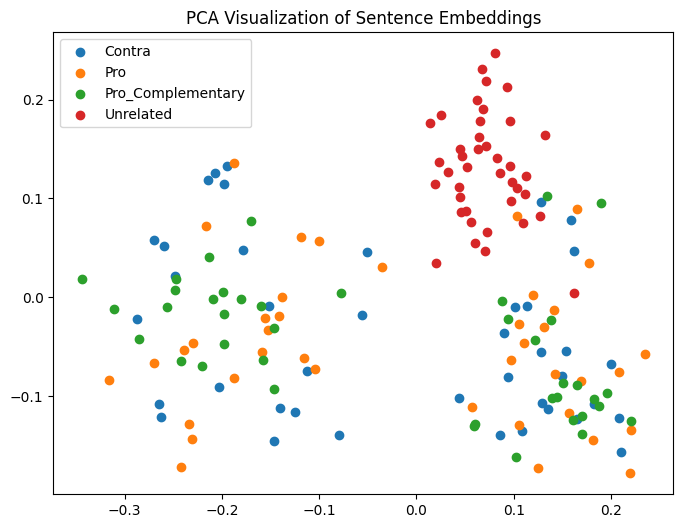

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get all embeddings for visualization
all_embeddings = df_test['Pro_embedding'].tolist() + df_test['Pro_Complementary_embedding'].tolist() + df_test['Contra_embedding'].tolist() + df_test['Unrelated_embedding'].tolist()
labels = ['Pro']*len(df_test) + ['Pro_Complementary']*len(df_test) + ['Contra']*len(df_test) + ['Unrelated']*len(df_test)

# Use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plot the embeddings
plt.figure(figsize=(8,6))
for i, label in enumerate(set(labels)):
    plt.scatter(reduced_embeddings[np.array(labels) == label, 0], reduced_embeddings[np.array(labels) == label, 1], label=label)
plt.legend()
plt.title('PCA Visualization of Sentence Embeddings')
plt.show()